In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, skew, kurtosis


# I- Hiqtorique de rendement 

In [7]:
# Charger le fichier CSV
Temperature_RainFall = "../data/TemperatureRainFall.csv"
data = pd.read_csv(Temperature_RainFall)
df = pd.DataFrame(data) 


In [8]:
# Afficher les premières lignes
print("🔹 1. Aperçu des premières lignes (head) :\n")
df.head(5)

🔹 1. Aperçu des premières lignes (head) :



,Date,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall
0,01/12/2008,13.4,22.9,16.9,21.8,0.6
1,02/12/2008,7.4,25.1,17.2,24.3,0.0
2,03/12/2008,12.9,25.7,21.0,23.2,0.0
3,04/12/2008,9.2,28.0,18.1,26.5,0.0
4,05/12/2008,17.5,32.3,17.8,29.7,1.0


In [9]:
# Dimensions des données
print("🔹 2. Dimensions des données (shape) :\n")
print(f"Lignes : {df.shape[0]}, Colonnes : {df.shape[1]}")

🔹 2. Dimensions des données (shape) :

Lignes : 3011, Colonnes : 6


In [10]:
# Informations sur le DataFrame
print("🔹 3. Informations sur les données :\n")
df.info()

🔹 3. Informations sur les données :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3011 non-null   object 
 1   MinTemp   3005 non-null   float64
 2   MaxTemp   3010 non-null   float64
 3   9amTemp   3007 non-null   float64
 4   3pmTemp   3007 non-null   float64
 5   Rainfall  2991 non-null   float64
dtypes: float64(5), object(1)
memory usage: 141.3+ KB


In [11]:
# Vérification des doublons
print("🔹 4. Vérification des doublons :\n")
print(np.unique(df.duplicated(), return_counts=True))

🔹 4. Vérification des doublons :

(array([False]), array([3011], dtype=int64))


In [13]:
# Valeurs uniques dans les colonnes "annee" et "culture"
print("🔹 5. Valeurs uniques dans 'date' :\n")
print(np.unique(df["Date"]))

🔹 5. Valeurs uniques dans 'date' :

['01/01/2009' '01/01/2010' '01/01/2011' ... '31/12/2014' '31/12/2015'
 '31/12/2016']


In [16]:
# Valeurs manquantes
print("🔹 7. Valeurs manquantes par colonne :\n")
df.isnull().sum()

🔹 7. Valeurs manquantes par colonne :



Date         0
MinTemp      6
MaxTemp      1
9amTemp      4
3pmTemp      4
Rainfall    20
dtype: int64

In [18]:
# Statistiques descriptives
print("🔹 8. Statistiques descriptives :\n")
df.describe()

🔹 8. Statistiques descriptives :



,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall
count,3005.000000,3010.000000,3007.000000,3007.000000,2991.000000
mean,9.520899,22.630963,14.348620,21.364716,1.925710
std,6.062028,7.796728,6.373137,7.525479,6.249052
min,-2.800000,6.800000,0.300000,6.400000,0.000000
25%,4.700000,15.800000,9.200000,14.900000,0.000000
50%,9.100000,21.900000,14.100000,20.600000,0.000000
75%,14.300000,28.900000,19.300000,27.200000,0.400000
max,28.300000,44.800000,34.500000,43.400000,104.200000


In [23]:
# Shapiro-Wilk pour MinTemp

# Extraire la colonne 'MinTemp' pour analyse (supprimer les valeurs manquantes)
min_temp = df["MinTemp"].dropna()

In [26]:
# Calculer la skewness et la kurtosis
skewness = skew(min_temp)
kurt = kurtosis(min_temp)

In [27]:
# Effectuer le test de Shapiro-Wilk pour la normalité
shapiro_test = shapiro(min_temp)

In [28]:
# Afficher les résultats
print("🔹 Résultats des tests de normalité pour 'MinTemp':")
print(f"Skewness : {skewness:.4f}")
print(f"Kurtosis : {kurt:.4f}")
print(f"Statistique de Shapiro-Wilk : {shapiro_test.statistic:.4f}")
print(f"P-valeur de Shapiro-Wilk : {shapiro_test.pvalue:.4f}")

🔹 Résultats des tests de normalité pour 'MinTemp':
Skewness : 0.2182
Kurtosis : -0.7941
Statistique de Shapiro-Wilk : 0.9802
P-valeur de Shapiro-Wilk : 0.0000


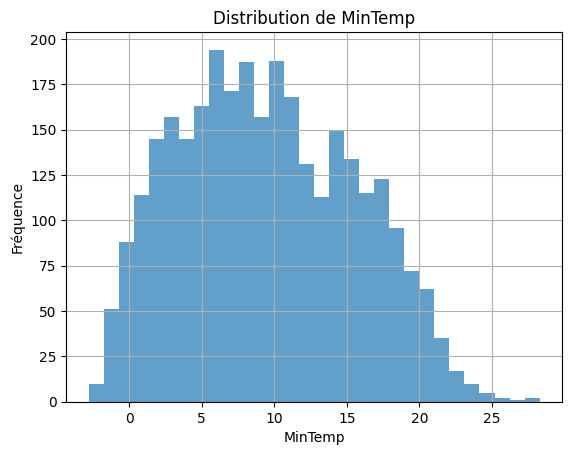

In [29]:
# Visualisation de l'histogramme
plt.hist(min_temp, bins=30, alpha=0.7)
plt.title("Distribution de MinTemp")
plt.xlabel("MinTemp")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

In [30]:

# Interprétation du test de Shapiro-Wilk
if shapiro_test.pvalue > 0.05:
    print("🔹 Conclusion : Les données suivent une distribution normale (p > 0.05).")
else:
    print("🔹 Conclusion : Les données ne suivent pas une distribution normale (p ≤ 0.05).")

🔹 Conclusion : Les données ne suivent pas une distribution normale (p ≤ 0.05).


Max Temperature

In [34]:
# Extraire la colonne 'MinTemp' pour analyse (supprimer les valeurs manquantes)
max_temp = df["MaxTemp"].dropna()

In [35]:
# Calculer la skewness et la kurtosis
skewness = skew(max_temp)
kurt = kurtosis(max_temp)

In [36]:
# Effectuer le test de Shapiro-Wilk pour la normalité
shapiro_test = shapiro(max_temp)

In [37]:
# Afficher les résultats
print("🔹 Résultats des tests de normalité pour 'MinTemp':")
print(f"Skewness : {skewness:.4f}")
print(f"Kurtosis : {kurt:.4f}")
print(f"Statistique de Shapiro-Wilk : {shapiro_test.statistic:.4f}")
print(f"P-valeur de Shapiro-Wilk : {shapiro_test.pvalue:.4f}")

🔹 Résultats des tests de normalité pour 'MinTemp':
Skewness : 0.3468
Kurtosis : -0.8265
Statistique de Shapiro-Wilk : 0.9651
P-valeur de Shapiro-Wilk : 0.0000


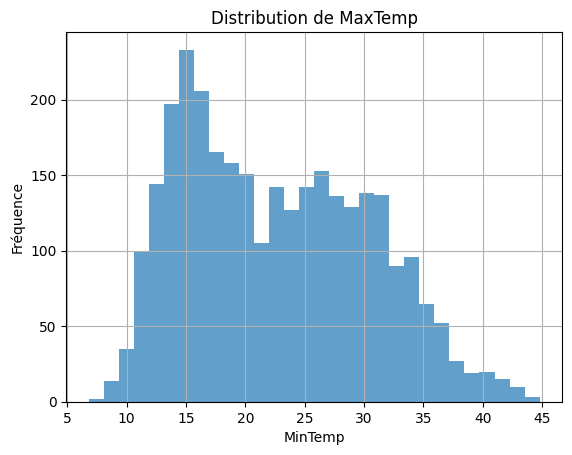

In [39]:
# Visualisation de l'histogramme
plt.hist(max_temp, bins=30, alpha=0.7)
plt.title("Distribution de MaxTemp")
plt.xlabel("MinTemp")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

In [40]:
# Interprétation du test de Shapiro-Wilk
if shapiro_test.pvalue > 0.05:
    print("🔹 Conclusion : Les données suivent une distribution normale (p > 0.05).")
else:
    print("🔹 Conclusion : Les données ne suivent pas une distribution normale (p ≤ 0.05).")

🔹 Conclusion : Les données ne suivent pas une distribution normale (p ≤ 0.05).


🔹 Résultats des tests de normalité pour '9amTemp':
Skewness : 0.2067
Kurtosis : -0.7531
Statistique de Shapiro-Wilk : 0.9817
P-valeur de Shapiro-Wilk : 0.0000


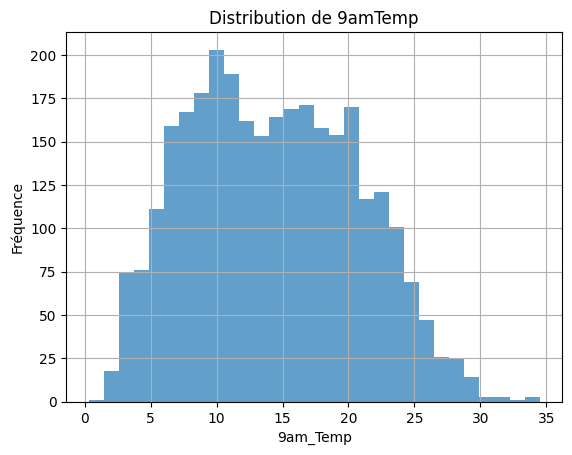

🔹 Conclusion : Les données ne suivent pas une distribution normale (p ≤ 0.05).


In [41]:
# Extraire la colonne 'MinTemp' pour analyse (supprimer les valeurs manquantes)
Nineam_Temp = df["9amTemp"].dropna()

# Calculer la skewness et la kurtosis
skewness = skew(Nineam_Temp)
kurt = kurtosis(Nineam_Temp)

# Effectuer le test de Shapiro-Wilk pour la normalité
shapiro_test = shapiro(Nineam_Temp)

# Afficher les résultats
print("🔹 Résultats des tests de normalité pour '9amTemp':")
print(f"Skewness : {skewness:.4f}")
print(f"Kurtosis : {kurt:.4f}")
print(f"Statistique de Shapiro-Wilk : {shapiro_test.statistic:.4f}")
print(f"P-valeur de Shapiro-Wilk : {shapiro_test.pvalue:.4f}")

# Visualisation de l'histogramme
plt.hist(Nineam_Temp, bins=30, alpha=0.7)
plt.title("Distribution de 9amTemp")
plt.xlabel("9am_Temp")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# Interprétation du test de Shapiro-Wilk
if shapiro_test.pvalue > 0.05:
    print("🔹 Conclusion : Les données suivent une distribution normale (p > 0.05).")
else:
    print("🔹 Conclusion : Les données ne suivent pas une distribution normale (p ≤ 0.05).")


🔹 Résultats des tests de normalité pour '3pmTemp':
Skewness : 0.3668
Kurtosis : -0.7440
Statistique de Shapiro-Wilk : 0.9681
P-valeur de Shapiro-Wilk : 0.0000


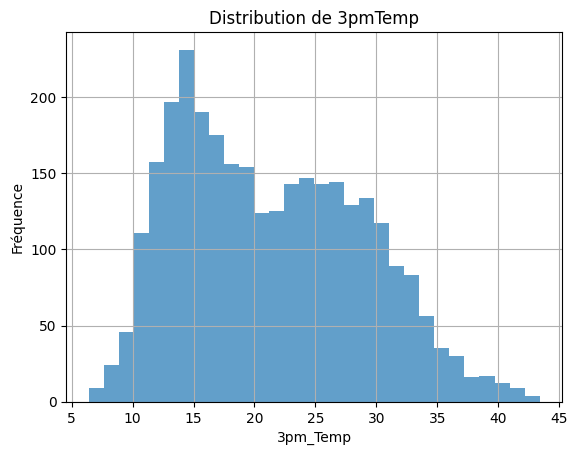

🔹 Conclusion : Les données ne suivent pas une distribution normale (p ≤ 0.05).


In [42]:
# Extraire la colonne 'MinTemp' pour analyse (supprimer les valeurs manquantes)
threpm_Temp = df["3pmTemp"].dropna()

# Calculer la skewness et la kurtosis
skewness = skew(threpm_Temp)
kurt = kurtosis(threpm_Temp)

# Effectuer le test de Shapiro-Wilk pour la normalité
shapiro_test = shapiro(threpm_Temp)

# Afficher les résultats
print("🔹 Résultats des tests de normalité pour '3pmTemp':")
print(f"Skewness : {skewness:.4f}")
print(f"Kurtosis : {kurt:.4f}")
print(f"Statistique de Shapiro-Wilk : {shapiro_test.statistic:.4f}")
print(f"P-valeur de Shapiro-Wilk : {shapiro_test.pvalue:.4f}")

# Visualisation de l'histogramme
plt.hist(threpm_Temp, bins=30, alpha=0.7)
plt.title("Distribution de 3pmTemp")
plt.xlabel("3pm_Temp")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# Interprétation du test de Shapiro-Wilk
if shapiro_test.pvalue > 0.05:
    print("🔹 Conclusion : Les données suivent une distribution normale (p > 0.05).")
else:
    print("🔹 Conclusion : Les données ne suivent pas une distribution normale (p ≤ 0.05).")


🔹 Résultats des tests de normalité pour 'Rainfall':
Skewness : 6.7505
Kurtosis : 68.5581
Statistique de Shapiro-Wilk : 0.3388
P-valeur de Shapiro-Wilk : 0.0000


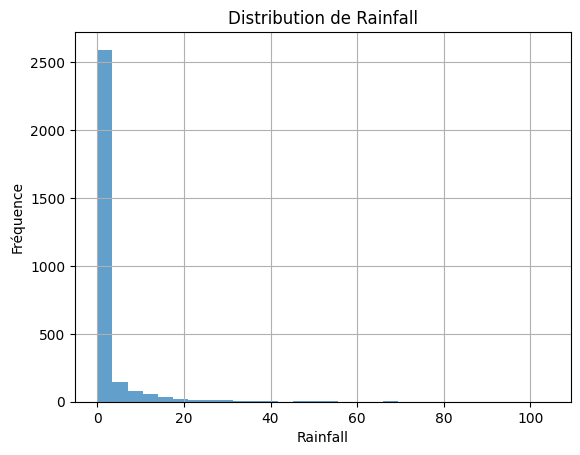

🔹 Conclusion : Les données ne suivent pas une distribution normale (p ≤ 0.05).


In [43]:
# Extraire la colonne 'MinTemp' pour analyse (supprimer les valeurs manquantes)
Rainfall = df["Rainfall"].dropna()

# Calculer la skewness et la kurtosis
skewness = skew(Rainfall)
kurt = kurtosis(Rainfall)

# Effectuer le test de Shapiro-Wilk pour la normalité
shapiro_test = shapiro(Rainfall)

# Afficher les résultats
print("🔹 Résultats des tests de normalité pour 'Rainfall':")
print(f"Skewness : {skewness:.4f}")
print(f"Kurtosis : {kurt:.4f}")
print(f"Statistique de Shapiro-Wilk : {shapiro_test.statistic:.4f}")
print(f"P-valeur de Shapiro-Wilk : {shapiro_test.pvalue:.4f}")

# Visualisation de l'histogramme
plt.hist(Rainfall, bins=30, alpha=0.7)
plt.title("Distribution de Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# Interprétation du test de Shapiro-Wilk
if shapiro_test.pvalue > 0.05:
    print("🔹 Conclusion : Les données suivent une distribution normale (p > 0.05).")
else:
    print("🔹 Conclusion : Les données ne suivent pas une distribution normale (p ≤ 0.05).")


In [47]:
# Détection des outliers
print("🔹 12. Détection des outliers pour 'max_temp':\n")
q1 = df["MaxTemp"].quantile(0.25)
q3 = df["MaxTemp"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Borne inférieure : {lower_bound}, Borne supérieure : {upper_bound}")
outliers = df[(df["MaxTemp"] < lower_bound) | (df["MaxTemp"] > upper_bound)]

🔹 12. Détection des outliers pour 'max_temp':

Borne inférieure : -3.849999999999998, Borne supérieure : 48.55


In [29]:
print(f"Nombre d'outliers : {outliers.shape[0]}")
outliers

Nombre d'outliers : 0


,parcelle_id,date,culture,rendement_estime,rendement_final,progression


In [53]:
# Détection des outliers
print("🔹 13. Détection des outliers pour 'MinTemp':\n")
q1 = df["MinTemp"].quantile(0.25)
q3 = df["MinTemp"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Borne inférieure : {lower_bound}, Borne supérieure : {upper_bound}")
outliers = df[(df["MinTemp"] < lower_bound) | (df["MinTemp"] > upper_bound)]

🔹 13. Détection des outliers pour 'MinTemp':

Borne inférieure : -9.700000000000003, Borne supérieure : 28.700000000000003


In [54]:
print(f"Nombre d'outliers : {outliers.shape[0]}")
outliers

Nombre d'outliers : 0


,Date,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall


In [55]:
# Détection des outliers
print("🔹 14. Détection des outliers pour '9amTemp':\n")
q1 = df["9amTemp"].quantile(0.25)
q3 = df["9amTemp"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Borne inférieure : {lower_bound}, Borne supérieure : {upper_bound}")
outliers = df[(df["9amTemp"] < lower_bound) | (df["9amTemp"] > upper_bound)]

🔹 14. Détection des outliers pour '9amTemp':

Borne inférieure : -5.950000000000003, Borne supérieure : 34.45


In [56]:
print(f"Nombre d'outliers : {outliers.shape[0]}")
outliers

Nombre d'outliers : 2


,Date,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall
68,08/02/2009,28.3,40.2,34.5,38.5,0.0
1423,08/01/2013,21.9,39.2,34.5,34.9,0.0


In [59]:
print("🔹 15. Détection des outliers pour '3pmTemp':\n")
q1 = df["3pmTemp"].quantile(0.25)
q3 = df["3pmTemp"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Borne inférieure : {lower_bound}, Borne supérieure : {upper_bound}")
outliers = df[(df["3pmTemp"] < lower_bound) | (df["3pmTemp"] > upper_bound)]

🔹 15. Détection des outliers pour '3pmTemp':

Borne inférieure : -3.549999999999999, Borne supérieure : 45.65


In [60]:
print(f"Nombre d'outliers : {outliers.shape[0]}")
outliers

Nombre d'outliers : 0


,Date,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall


🔹 13. Pairplot des données:



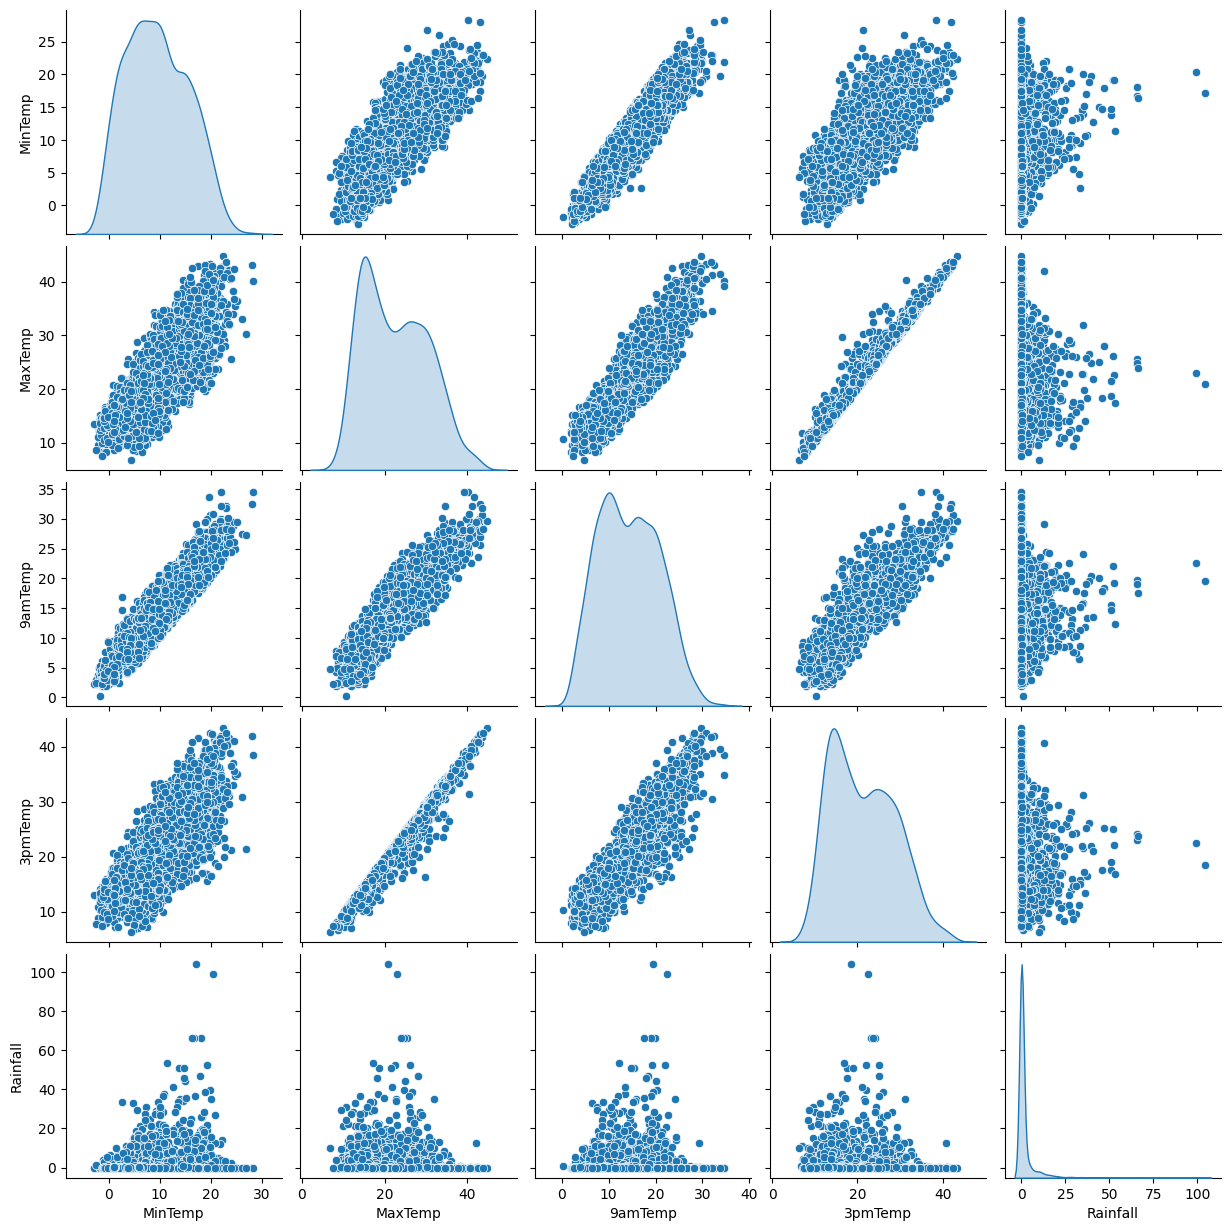

In [61]:
# Pairplot des données
print("🔹 13. Pairplot des données:\n")
sns.pairplot(df, diag_kind="kde")
plt.show()

 ## Analyse des Données

### Aperçu des données

- **Nombre de lignes (rows) :** 250  
- **Nombre de colonnes (columns) :** 4  
- **Noms des colonnes :** `parcelle_id`, `annee`, `culture`, `rendement`  
- **Doublons :** Aucun doublon détecté  
- **Valeurs manquantes :** Aucune  
- **Années :** 5, de 2020 à 2024  
- **Cultures :** `Mais`, `Ble`, `Tournesol`  

---

### Statistiques descriptives

- **Moyenne des rendements :** 6.89  
- **Rendement minimum :** 0.77  
- **Rendement maximum :** 20.77  
- **Médiane des rendements :** 5.61  
- **Écart-type :** 4.54  
- La **médiane** est supérieure à la **moyenne**, indiquant une **asymétrie à droite**, ce qui met en évidence la présence de **outliers** potentiels.  

---

### Outliers

- **Méthode IQR :**  
    - **Borne inférieure :** -6.04  
    - **Borne supérieure :** 19.37  

- En utilisant ces bornes, le jeu de données contient des **outliers** à l'extrémité supérieure, avec au moins **2 cas détectés** :  
  - **parcelle_id P003 (2020, Mais) : rendement = 20.77**  
  - **parcelle_id P035 (2020, Mais) : rendement = 20.01**

---

### Visualisations

- **Histogramme :**  
  La distribution des rendements est **asymétrique à droite** (right-skewed), avec la majorité des rendements concentrés entre **0 et 10**.  

- **Boxplot :**  
  Le boxplot montre une variation significative des rendements selon la culture :  
  - **Mais** a la **médiane la plus élevée** et les valeurs les plus dispersées (avec des outliers).  
  - **Ble** a une distribution plus homogène, concentrée entre 5 et 10.  
  - **Tournesol** a des rendements généralement faibles, concentrés entre 2 et 5.  

---

### Interprétation

- **Pourquoi Mais surpasse-t-il les autres cultures ?**  
  La culture de Mais semble être associée à des rendements plus élevés. Cela pourrait être dû à des **conditions spécifiques** favorables à cette culture, comme les pratiques agricoles, le type de sol ou les conditions climatiques
